In [1]:
import tensorflow as tf
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9

(X_train,y_train),(X_test,y_test) = mnist.load_data() #unpack data

X_train = tf.keras.utils.normalize(X_train, axis =1) #normalize the data
X_test = tf.keras.utils.normalize(X_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=6)

11493376/11490434 [==============================] - 18s 2us/step
Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4670 - accuracy: 0.8687
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1123 - accuracy: 0.9650
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0710 - accuracy: 0.9778
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9839
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.9878
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0297 - accuracy: 0.9902


In [15]:
val_loss,val_acc = model.evaluate(X_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9681
0.11190981417894363 0.9681000113487244


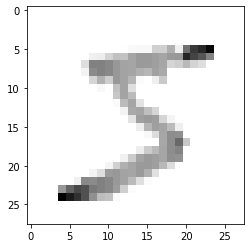

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

print(X_train[0])

In [17]:
model.save('num_reader.h5')

In [18]:
new_model = tf.keras.models.load_model('num_reader.h5')

In [19]:
#making predictions

predictions = new_model.predict([X_test])

In [20]:
print(predictions)

[[6.7391848e-09 1.5315816e-09 1.7002749e-06 ... 9.9928290e-01
  5.9866196e-09 2.2750544e-06]
 [4.1890085e-12 6.1627965e-08 9.9999988e-01 ... 7.6398322e-13
  6.0320970e-14 7.8501429e-22]
 [1.2581237e-09 9.9998128e-01 2.9579434e-07 ... 1.5293803e-05
  2.5620861e-06 5.2841009e-10]
 ...
 [2.3878508e-10 2.1931404e-08 7.5010047e-11 ... 5.7129984e-07
  3.7474942e-07 9.2493665e-06]
 [1.4704960e-08 4.9722430e-06 4.2854947e-10 ... 7.6003372e-09
  3.9834886e-06 2.4885014e-12]
 [3.2105008e-09 1.4378822e-10 3.9366482e-10 ... 9.4053461e-14
  1.0693941e-09 1.6409234e-10]]


In [21]:
print(np.argmax(predictions[0]))

7


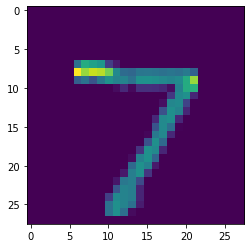

In [22]:
plt.imshow(X_test[0])

In [23]:
print(np.argmax(predictions[1]))


2


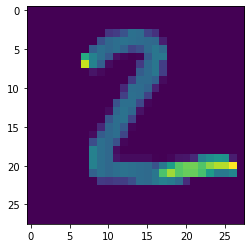

In [24]:
plt.imshow(X_test[1])

In [25]:
#confusion matrix
from sklearn import metrics
d = new_model.predict_classes(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,d)


/home/kasun/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [26]:
print(metrics.classification_report(y_test,d))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.91      0.99      0.95      1010
           4       0.97      0.98      0.98       982
           5       0.96      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.93      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<AxesSubplot:>

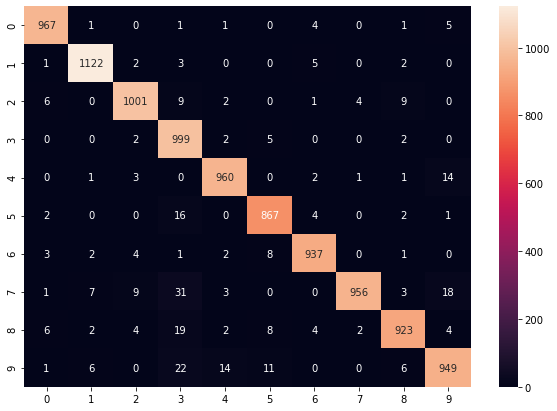

In [27]:

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm,annot = True,fmt='g'
)
